# **Modeling**

# Part 1: Preparing the Data

In [340]:
import pandas as pd
import numpy as np
np.random.seed(4)
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [341]:
os.getcwd()

'/workspace'

In [342]:
data = pd.read_csv('Crime_Clean2.csv')

In [343]:
data.head()

,Unnamed: 0,Incident ID,City,Police District Name,Block,Crime Name1,Crime Name2,Crime Name3,Victims,Place,...,Other Race %,Month,Day,Hour_Minute,Hour,Hour_Y,Hour_X,Time_of_Day,Season,Weekday
0,0,201268391,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,0.007143,12,2019-12-06,21:16,21,0.707107,-0.707107,Night,Fall,1.0
1,1,201234989,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Crime Against Person,Fondling,SEX OFFENSE - FONDLING,1,Residence - Single Family,...,0.007143,4,2019-04-13,02:00,2,0.866025,0.500000,Late Night,Spring,0.0
2,2,201281727,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Yard,...,0.007143,3,2020-03-13,09:09,9,-0.707107,0.707107,Morning,Winter,1.0
3,3,201265326,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,0.007143,11,2019-11-15,16:33,16,-0.500000,-0.866025,Late Afternoon/Early Evening,Fall,1.0
4,4,201090622,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Street - Other,...,0.007143,7,2016-07-22,22:27,22,0.866025,-0.500000,Night,Summer,1.0


In [344]:
len(data)

235368

In [345]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                165
Crime Name2                165
Crime Name3                165
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
Male                         0
Female                       0
Black                        0
White                        0
Asian                        0
American Indian              0
Other Race                   0
High School %                0
Bachelor

In [346]:
##Exclude rows for which Crime Name1 is null

data = data[~data['Crime Name1'].isnull()]

In [347]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                  0
Crime Name2                  0
Crime Name3                  0
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
Male                         0
Female                       0
Black                        0
White                        0
Asian                        0
American Indian              0
Other Race                   0
High School %                0
Bachelor

In [348]:
## Exclude Other category from Analysis

data = data[data['Crime Name1'] != 'Other']
data = data[data['Crime Name1'] != 'Not a Crime']

In [349]:
classes_gen = data['Crime Name1'].value_counts()

top_classes_gen = list(classes_gen.index.values)

top_classes_gen = sorted(top_classes_gen)
top_classes_gen

['Crime Against Person', 'Crime Against Property', 'Crime Against Society']

In [350]:
data = data.drop(['Unnamed: 0','Educational Attainment','Bachelors','High School','Means of Transportation','Public Transportation',
          'Total Laborforce','Total Unemployed', 'Crime Name2','Male','Female','Black','White','Asian','Other Race',
                 'American Indian','Male %', 'Female %','American Indian %', 'Other Race %', 'Asian %','Month','Hour_Minute','Season',
                 'Hour_X','Hour_Y','Hour','City'],1)

In [351]:
data.columns

Index(['Incident ID', 'Police District Name', 'Block', 'Crime Name1',
       'Crime Name3', 'Victims', 'Place', 'Pop', 'Income', 'Age',
       'Start_Date_Time', 'Location', 'Longitude', 'Latitude', 'High School %',
       'Bachelors %', 'Public Transportation %', 'Unemployed %', 'White %',
       'Black %', 'Day', 'Time_of_Day', 'Weekday'],
      dtype='object')

# Create Geographical Clusters Based Purely on Locations

In [352]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=20, random_state=4).fit(data[['Latitude','Longitude']])
preds = clusterer.predict(data[['Latitude','Longitude']])
data['Cluster_No'] = preds

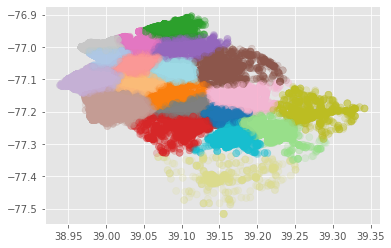

In [353]:
X = np.array(data[['Latitude','Longitude']], dtype='float64')
plt.scatter(X[:,0],X[:,1], alpha=0.2, s=50, c = data['Cluster_No'], cmap='tab20')
plt.show()

In [354]:
data_clust = data[['Cluster_No','Latitude','Longitude']]

data_clust2 = pd.DataFrame(data_clust.groupby(['Cluster_No']).mean())

In [355]:
data = pd.merge(data_clust2, data, how='left', on='Cluster_No')

In [356]:
data = data.drop(['Block','Location'],axis=1)

In [357]:
data.head()

,Cluster_No,Latitude_x,Longitude_x,Incident ID,Police District Name,Crime Name1,Crime Name3,Victims,Place,Pop,...,Latitude_y,High School %,Bachelors %,Public Transportation %,Unemployed %,White %,Black %,Day,Time_of_Day,Weekday
0,0,39.152632,-77.206552,201267436,MONTGOMERY VILLAGE,Crime Against Society,DRIVING UNDER THE INFLUENCE LIQUOR,1,Street - In vehicle,2111.0,...,39.149109,0.108555,0.312006,0.080184,0.033214,0.709398,0.043855,2019-11-22,Late Night,1.0
1,0,39.152632,-77.206552,201268261,MONTGOMERY VILLAGE,Crime Against Society,LIQUOR - POSSESS,1,Street - In vehicle,2111.0,...,39.149109,0.108555,0.312006,0.080184,0.033214,0.709398,0.043855,2019-12-06,Late Night,1.0
2,0,39.152632,-77.206552,201268261,MONTGOMERY VILLAGE,Crime Against Society,DRIVING UNDER THE INFLUENCE LIQUOR,1,Street - In vehicle,2111.0,...,39.149109,0.108555,0.312006,0.080184,0.033214,0.709398,0.043855,2019-12-06,Late Night,1.0
3,0,39.152632,-77.206552,201296384,MONTGOMERY VILLAGE,Crime Against Property,LARCENY - FROM AUTO,1,Street - Residential,920.0,...,39.138933,0.088983,0.194915,0.146293,0.056926,0.633886,0.004739,2020-07-29,Early Morning,1.0
4,0,39.152632,-77.206552,201088750,MONTGOMERY VILLAGE,Crime Against Property,ROBBERY - STREET-STRONG-ARM,1,Parking Lot - Other,920.0,...,39.141412,0.088983,0.194915,0.146293,0.056926,0.633886,0.004739,2016-07-12,Late Night,1.0


In [358]:
data['Crimes Against Society Count'] = 0
data['Crimes Against Property Count'] = 0
data['Crimes Against Persons Count'] = 0

# Group the Data by Cluster and Day

In [359]:
df = data.groupby(['Cluster_No','Day']).size().reset_index(name='Count')
df

,Cluster_No,Day,Count
0,0,2016-07-01,11
1,0,2016-07-02,35
2,0,2016-07-03,15
3,0,2016-07-04,9
4,0,2016-07-05,21
...,...,...,...
30697,19,2021-01-30,3
30698,19,2021-01-31,4
30699,19,2021-02-01,1
30700,19,2021-02-02,7


In [360]:
df2 = data.groupby(['Cluster_No','Day','Crime Name1']).size().reset_index(name='Count')
df2

,Cluster_No,Day,Crime Name1,Count
0,0,2016-07-01,Crime Against Person,2
1,0,2016-07-01,Crime Against Property,4
2,0,2016-07-01,Crime Against Society,5
3,0,2016-07-02,Crime Against Person,6
4,0,2016-07-02,Crime Against Property,11
...,...,...,...,...
63254,19,2021-01-31,Crime Against Property,3
63255,19,2021-02-01,Crime Against Property,1
63256,19,2021-02-02,Crime Against Person,1
63257,19,2021-02-02,Crime Against Property,6


In [361]:
df2 = data[data['Crime Name1'] == 'Crime Against Person'].groupby(['Cluster_No','Day']).size().reset_index(name='Crime Against Person Count')
df2

,Cluster_No,Day,Crime Against Person Count
0,0,2016-07-01,2
1,0,2016-07-02,6
2,0,2016-07-03,2
3,0,2016-07-04,1
4,0,2016-07-05,2
...,...,...,...
14081,19,2021-01-28,1
14082,19,2021-01-29,1
14083,19,2021-01-30,1
14084,19,2021-01-31,1


In [362]:
df2b = data[data['Crime Name1'] == 'Crime Against Property'].groupby(['Cluster_No','Day']).size().reset_index(name='Crime Against Property Count')
df2b

,Cluster_No,Day,Crime Against Property Count
0,0,2016-07-01,4
1,0,2016-07-02,11
2,0,2016-07-03,4
3,0,2016-07-04,3
4,0,2016-07-05,8
...,...,...,...
28320,19,2021-01-30,1
28321,19,2021-01-31,3
28322,19,2021-02-01,1
28323,19,2021-02-02,6


In [363]:
df2c = data[data['Crime Name1'] == 'Crime Against Society'].groupby(['Cluster_No','Day']).size().reset_index(name='Crime Against Society Count')
df2c

,Cluster_No,Day,Crime Against Society Count
0,0,2016-07-01,5
1,0,2016-07-02,18
2,0,2016-07-03,9
3,0,2016-07-04,5
4,0,2016-07-05,11
...,...,...,...
20843,19,2021-01-15,2
20844,19,2021-01-19,1
20845,19,2021-01-20,1
20846,19,2021-01-28,1


In [364]:
df3 = data.groupby(['Cluster_No','Day','Place']).size().reset_index(name='Count')
df3

,Cluster_No,Day,Place,Count
0,0,2016-07-01,Hotel/Motel/Etc.,1
1,0,2016-07-01,Other/Unknown,1
2,0,2016-07-01,Parking Lot - Residential,1
3,0,2016-07-01,Restaurant,1
4,0,2016-07-01,Retail - Department/Discount Store,1
...,...,...,...,...
134617,19,2021-02-02,Parking Lot - Residential,1
134618,19,2021-02-02,Residence - Apartment/Condo,1
134619,19,2021-02-02,Street - Residential,1
134620,19,2021-02-03,Residence - Driveway,1


In [365]:
df4 = data.groupby(['Cluster_No','Day','Time_of_Day']).size().reset_index(name='Count')
df4

,Cluster_No,Day,Time_of_Day,Count
0,0,2016-07-01,Afternoon,1
1,0,2016-07-01,Late Night,5
2,0,2016-07-01,Morning,1
3,0,2016-07-01,Night,4
4,0,2016-07-02,Afternoon,1
...,...,...,...,...
95707,19,2021-02-02,Late Night,2
95708,19,2021-02-02,Morning,2
95709,19,2021-02-02,Night,1
95710,19,2021-02-03,Late Afternoon/Early Evening,1


In [366]:
df5 = data.groupby(['Cluster_No','Day','Weekday']).size().reset_index(name='Count')
df5

,Cluster_No,Day,Weekday,Count
0,0,2016-07-01,1.0,11
1,0,2016-07-02,0.0,35
2,0,2016-07-03,0.0,15
3,0,2016-07-04,1.0,9
4,0,2016-07-05,1.0,21
...,...,...,...,...
30697,19,2021-01-30,0.0,3
30698,19,2021-01-31,0.0,4
30699,19,2021-02-01,1.0,1
30700,19,2021-02-02,1.0,7


In [367]:
df6 = data.groupby(['Cluster_No','Day'])
df6b = df6['Income'].mean().reset_index(name='Mean Income')
df6b


,Cluster_No,Day,Mean Income
0,0,2016-07-01,85389.272727
1,0,2016-07-02,70663.742857
2,0,2016-07-03,60633.666667
3,0,2016-07-04,62687.555556
4,0,2016-07-05,68942.952381
...,...,...,...
30697,19,2021-01-30,62305.000000
30698,19,2021-01-31,96935.500000
30699,19,2021-02-01,73159.000000
30700,19,2021-02-02,91998.285714


In [368]:
df6c = df6['Pop'].mean().reset_index(name='Mean Pop')
df6c

,Cluster_No,Day,Mean Pop
0,0,2016-07-01,2269.727273
1,0,2016-07-02,1649.914286
2,0,2016-07-03,2482.400000
3,0,2016-07-04,1824.111111
4,0,2016-07-05,1901.190476
...,...,...,...
30697,19,2021-01-30,2724.333333
30698,19,2021-01-31,2198.000000
30699,19,2021-02-01,1978.000000
30700,19,2021-02-02,1439.142857


In [369]:
df6d = df6['Public Transportation %'].mean().reset_index(name='Mean Public Transportation %')
df6d

,Cluster_No,Day,Mean Public Transportation %
0,0,2016-07-01,0.105908
1,0,2016-07-02,0.086069
2,0,2016-07-03,0.106510
3,0,2016-07-04,0.155012
4,0,2016-07-05,0.100541
...,...,...,...
30697,19,2021-01-30,0.179354
30698,19,2021-01-31,0.197263
30699,19,2021-02-01,0.217012
30700,19,2021-02-02,0.108646


In [370]:
df6e = df6['Victims'].mean().reset_index(name='Mean Victims')
df6e

,Cluster_No,Day,Mean Victims
0,0,2016-07-01,1.090909
1,0,2016-07-02,1.057143
2,0,2016-07-03,1.066667
3,0,2016-07-04,1.111111
4,0,2016-07-05,1.047619
...,...,...,...
30697,19,2021-01-30,1.333333
30698,19,2021-01-31,1.000000
30699,19,2021-02-01,1.000000
30700,19,2021-02-02,1.142857


In [371]:
df_final = pd.merge(df, df6b, how='left', on=['Cluster_No','Day'])
df_final.head()

,Cluster_No,Day,Count,Mean Income
0,0,2016-07-01,11,85389.272727
1,0,2016-07-02,35,70663.742857
2,0,2016-07-03,15,60633.666667
3,0,2016-07-04,9,62687.555556
4,0,2016-07-05,21,68942.952381


In [372]:
df_final = pd.merge(df_final, df6c, how='left', on=['Cluster_No','Day'])
df_final = pd.merge(df_final, df6d, how='left', on=['Cluster_No','Day'])
df_final = pd.merge(df_final, df6e, how='left', on=['Cluster_No','Day'])
df_final.head()

,Cluster_No,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims
0,0,2016-07-01,11,85389.272727,2269.727273,0.105908,1.090909
1,0,2016-07-02,35,70663.742857,1649.914286,0.086069,1.057143
2,0,2016-07-03,15,60633.666667,2482.400000,0.106510,1.066667
3,0,2016-07-04,9,62687.555556,1824.111111,0.155012,1.111111
4,0,2016-07-05,21,68942.952381,1901.190476,0.100541,1.047619


In [373]:
df_final2 = pd.merge(data_clust2, df_final, how='left', on='Cluster_No')
df_final2

,Cluster_No,Latitude,Longitude,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims
0,0,39.152632,-77.206552,2016-07-01,11,85389.272727,2269.727273,0.105908,1.090909
1,0,39.152632,-77.206552,2016-07-02,35,70663.742857,1649.914286,0.086069,1.057143
2,0,39.152632,-77.206552,2016-07-03,15,60633.666667,2482.400000,0.106510,1.066667
3,0,39.152632,-77.206552,2016-07-04,9,62687.555556,1824.111111,0.155012,1.111111
4,0,39.152632,-77.206552,2016-07-05,21,68942.952381,1901.190476,0.100541,1.047619
...,...,...,...,...,...,...,...,...,...
30697,19,39.083249,-77.072593,2021-01-30,3,62305.000000,2724.333333,0.179354,1.333333
30698,19,39.083249,-77.072593,2021-01-31,4,96935.500000,2198.000000,0.197263,1.000000
30699,19,39.083249,-77.072593,2021-02-01,1,73159.000000,1978.000000,0.217012,1.000000
30700,19,39.083249,-77.072593,2021-02-02,7,91998.285714,1439.142857,0.108646,1.142857


In [374]:
df_final2 = pd.merge(df_final2,df2, how='left', on=['Cluster_No','Day'])
df_final2

,Cluster_No,Latitude,Longitude,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count
0,0,39.152632,-77.206552,2016-07-01,11,85389.272727,2269.727273,0.105908,1.090909,2.0
1,0,39.152632,-77.206552,2016-07-02,35,70663.742857,1649.914286,0.086069,1.057143,6.0
2,0,39.152632,-77.206552,2016-07-03,15,60633.666667,2482.400000,0.106510,1.066667,2.0
3,0,39.152632,-77.206552,2016-07-04,9,62687.555556,1824.111111,0.155012,1.111111,1.0
4,0,39.152632,-77.206552,2016-07-05,21,68942.952381,1901.190476,0.100541,1.047619,2.0
...,...,...,...,...,...,...,...,...,...,...
30697,19,39.083249,-77.072593,2021-01-30,3,62305.000000,2724.333333,0.179354,1.333333,1.0
30698,19,39.083249,-77.072593,2021-01-31,4,96935.500000,2198.000000,0.197263,1.000000,1.0
30699,19,39.083249,-77.072593,2021-02-01,1,73159.000000,1978.000000,0.217012,1.000000,NaN
30700,19,39.083249,-77.072593,2021-02-02,7,91998.285714,1439.142857,0.108646,1.142857,1.0


In [375]:
df_final2 = pd.merge(df_final2,df2b, how='left', on=['Cluster_No','Day'])
df_final2

,Cluster_No,Latitude,Longitude,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count
0,0,39.152632,-77.206552,2016-07-01,11,85389.272727,2269.727273,0.105908,1.090909,2.0,4.0
1,0,39.152632,-77.206552,2016-07-02,35,70663.742857,1649.914286,0.086069,1.057143,6.0,11.0
2,0,39.152632,-77.206552,2016-07-03,15,60633.666667,2482.400000,0.106510,1.066667,2.0,4.0
3,0,39.152632,-77.206552,2016-07-04,9,62687.555556,1824.111111,0.155012,1.111111,1.0,3.0
4,0,39.152632,-77.206552,2016-07-05,21,68942.952381,1901.190476,0.100541,1.047619,2.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
30697,19,39.083249,-77.072593,2021-01-30,3,62305.000000,2724.333333,0.179354,1.333333,1.0,1.0
30698,19,39.083249,-77.072593,2021-01-31,4,96935.500000,2198.000000,0.197263,1.000000,1.0,3.0
30699,19,39.083249,-77.072593,2021-02-01,1,73159.000000,1978.000000,0.217012,1.000000,NaN,1.0
30700,19,39.083249,-77.072593,2021-02-02,7,91998.285714,1439.142857,0.108646,1.142857,1.0,6.0


In [376]:
df_final2 = pd.merge(df_final2,df2c, how='left', on=['Cluster_No','Day'])
df_final2

,Cluster_No,Latitude,Longitude,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count,Crime Against Society Count
0,0,39.152632,-77.206552,2016-07-01,11,85389.272727,2269.727273,0.105908,1.090909,2.0,4.0,5.0
1,0,39.152632,-77.206552,2016-07-02,35,70663.742857,1649.914286,0.086069,1.057143,6.0,11.0,18.0
2,0,39.152632,-77.206552,2016-07-03,15,60633.666667,2482.400000,0.106510,1.066667,2.0,4.0,9.0
3,0,39.152632,-77.206552,2016-07-04,9,62687.555556,1824.111111,0.155012,1.111111,1.0,3.0,5.0
4,0,39.152632,-77.206552,2016-07-05,21,68942.952381,1901.190476,0.100541,1.047619,2.0,8.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30697,19,39.083249,-77.072593,2021-01-30,3,62305.000000,2724.333333,0.179354,1.333333,1.0,1.0,1.0
30698,19,39.083249,-77.072593,2021-01-31,4,96935.500000,2198.000000,0.197263,1.000000,1.0,3.0,NaN
30699,19,39.083249,-77.072593,2021-02-01,1,73159.000000,1978.000000,0.217012,1.000000,NaN,1.0,NaN
30700,19,39.083249,-77.072593,2021-02-02,7,91998.285714,1439.142857,0.108646,1.142857,1.0,6.0,NaN


In [377]:
def func(data, df_final):
    
    for place in np.unique(data['Place']):
        
        df2 = data[data['Place'] == place].groupby(['Cluster_No','Day']).size().reset_index(name=place + " Count")
        df_final = pd.merge(df_final,df2, how='left', on=['Cluster_No','Day'])
        
    return df_final

In [378]:
df_final3 = func(data,df_final2)
df_final3.shape

(30702, 95)

In [379]:
df_final3.head()

,Cluster_No,Latitude,Longitude,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,...,Retail - Video Store Count,School/College Count,Street - Alley Count,Street - Bus Stop Count,Street - Commercial Count,Street - In vehicle Count,Street - Other Count,Street - Residential Count,Theater Count,Wooded Area Count
0,0,39.152632,-77.206552,2016-07-01,11,85389.272727,2269.727273,0.105908,1.090909,2.0,...,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN
1,0,39.152632,-77.206552,2016-07-02,35,70663.742857,1649.914286,0.086069,1.057143,6.0,...,NaN,NaN,NaN,NaN,2.0,9.0,NaN,8.0,NaN,NaN
2,0,39.152632,-77.206552,2016-07-03,15,60633.666667,2482.400000,0.106510,1.066667,2.0,...,NaN,NaN,NaN,NaN,1.0,5.0,NaN,1.0,NaN,NaN
3,0,39.152632,-77.206552,2016-07-04,9,62687.555556,1824.111111,0.155012,1.111111,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,0,39.152632,-77.206552,2016-07-05,21,68942.952381,1901.190476,0.100541,1.047619,2.0,...,NaN,NaN,NaN,3.0,NaN,4.0,NaN,1.0,NaN,NaN


In [380]:
len(df_final3)

30702

In [381]:
data = df_final3.copy()

In [382]:
rand = data[data['Cluster_No'] == 0]
len(rand)

1679

# Create and Implement Rolling Window Functions for Each Cluster by Creating Dataframes for Each Cluster

In [383]:
data['30 Rolling Crimes Against Society Count'] = 0
data['30 Rolling Crimes Against Property Count'] = 0
data['30 Rolling Crimes Against Persons Count'] = 0
data['7 Rolling Crimes Against Society Count'] = 0
data['7 Rolling Crimes Against Property Count'] = 0
data['7 Rolling Crimes Against Persons Count'] = 0
data['1 Rolling Crimes Against Society Count'] = 0
data['1 Rolling Crimes Against Property Count'] = 0
data['1 Rolling Crimes Against Persons Count'] = 0

In [384]:
np.unique(data['Cluster_No'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [385]:
def cluster_func(data):
    
    dataframe_list = []
    
    for cluster in np.unique(data['Cluster_No']):
        
        data_new = data[data['Cluster_No'] == cluster].copy()
        
        data_new['30 Rolling Crimes Against Society Count'] = data_new['Crime Against Society Count'].shift(1).rolling(30).mean()
        data_new['30 Rolling Crimes Against Property Count'] = data_new['Crime Against Property Count'].shift(1).rolling(30).mean()
        data_new['30 Rolling Crimes Against Persons Count'] = data_new['Crime Against Person Count'].shift(1).rolling(30).mean()
        
        data_new['7 Rolling Crimes Against Society Count'] = data_new['Crime Against Society Count'].shift(1).rolling(7).mean()
        data_new['7 Rolling Crimes Against Property Count'] = data_new['Crime Against Property Count'].shift(1).rolling(7).mean()
        data_new['7 Rolling Crimes Against Persons Count'] = data_new['Crime Against Person Count'].shift(1).rolling(7).mean()
        

        data_new['2 Rolling Crimes Against Society Count'] = data_new['Crime Against Society Count'].shift(1).rolling(2).mean()
        data_new['2 Rolling Crimes Against Property Count'] = data_new['Crime Against Property Count'].shift(1).rolling(2).mean()
        data_new['2 Rolling Crimes Against Persons Count'] = data_new['Crime Against Person Count'].shift(1).rolling(2).mean()
        
        dataframe_list.append(data_new)
        
    return dataframe_list

In [386]:
## Function for obtaining rolling sum of all three crime types for previous 30, 7, and 2 days

def rolling_acs_count_func(dataframe_list):
    
    for data in dataframe_list:
        
        data['30 Rolling Mean Income'] = data['Mean Income'].shift(1).rolling(30).mean()
        data['30 Rolling Mean Pop'] = data['Mean Pop'].shift(1).rolling(30).mean()
        data['30 Rolling Mean Victims'] = data['Mean Victims'].shift(1).rolling(30).mean()
        data['30 Rolling Mean Public Transportation %'] = data['Mean Public Transportation %'].shift(1).rolling(30).mean()  
        
    return dataframe_list

In [387]:
## Function for obtaining counts for all places for each cluster

import re

def rolling_place_count_func(dataframe_list):
    
    pattern = r'.*\s*(Place)\.*'
    
    for data in dataframe_list:
        
        for column in data.columns:
            
            if re.match(pattern, column):
                
                data['30 Rolling Mean ' +  column] = data[column].shift(1).rolling(30).mean()
        
    return dataframe_list

In [390]:
## Function for creating datetime object from Day variable

def day_to_datetime(dataframe_list):
    
    for data in dataframe_list:
        
        data['Day'] = pd.to_datetime(data['Day'])
        
    return dataframe_list

In [391]:
## Function for obtaining time of day for each cluster

import datetime
import calendar

def time_of_day(dataframe_list):
    
    for data in dataframe_list:
        
        data['Day_Of_Week'] = data['Day'].dt.dayofweek
        
    return dataframe_list

In [393]:
data_final = cluster_func(data)
data_final = rolling_acs_count_func(data_final)
data_final = rolling_place_count_func(data_final)
data_final = day_to_datetime(data_final)
data_final = time_of_day(data_final)

In [394]:
len(data_final)

20

In [395]:
data_final[0].head(9)

,Cluster_No,Latitude,Longitude,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,...,1 Rolling Crimes Against Property Count,1 Rolling Crimes Against Persons Count,2 Rolling Crimes Against Society Count,2 Rolling Crimes Against Property Count,2 Rolling Crimes Against Persons Count,30 Rolling Mean Income,30 Rolling Mean Pop,30 Rolling Mean Victims,30 Rolling Mean Public Transportation %,Day_Of_Week
0,0,39.152632,-77.206552,2016-07-01,11,85389.272727,2269.727273,0.105908,1.090909,2.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,0,39.152632,-77.206552,2016-07-02,35,70663.742857,1649.914286,0.086069,1.057143,6.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,0,39.152632,-77.206552,2016-07-03,15,60633.666667,2482.400000,0.106510,1.066667,2.0,...,0,0,11.5,7.5,4.0,NaN,NaN,NaN,NaN,6
3,0,39.152632,-77.206552,2016-07-04,9,62687.555556,1824.111111,0.155012,1.111111,1.0,...,0,0,13.5,7.5,4.0,NaN,NaN,NaN,NaN,0
4,0,39.152632,-77.206552,2016-07-05,21,68942.952381,1901.190476,0.100541,1.047619,2.0,...,0,0,7.0,3.5,1.5,NaN,NaN,NaN,NaN,1
5,0,39.152632,-77.206552,2016-07-06,17,70584.176471,1855.529412,0.127799,1.058824,2.0,...,0,0,8.0,5.5,1.5,NaN,NaN,NaN,NaN,2
6,0,39.152632,-77.206552,2016-07-07,14,71334.000000,1839.857143,0.112096,1.357143,3.0,...,0,0,6.5,10.5,2.0,NaN,NaN,NaN,NaN,3
7,0,39.152632,-77.206552,2016-07-08,11,75196.636364,2395.090909,0.144368,1.090909,1.0,...,0,0,3.0,10.0,2.5,NaN,NaN,NaN,NaN,4
8,0,39.152632,-77.206552,2016-07-09,10,82115.300000,2193.100000,0.103158,1.000000,1.0,...,0,0,4.5,6.0,2.0,NaN,NaN,NaN,NaN,5


In [396]:
len(data_final[0])

1679

In [397]:
data_final[0]['30 Rolling Crimes Against Property Count'].isnull().sum()

524

In [398]:
for i in range(len(data_final)):
    data_final[i].replace([np.inf, -np.inf], np.nan, inplace=True)
    data_final[i].fillna(0,inplace=True)

In [399]:
data_final[0]['30 Rolling Crimes Against Property Count'].isnull().sum()

0

In [400]:
## Create function to get the labels for each crime type for each cluster

def get_labels(data):

    labels1 = []
    labels2 = []
    labels3 = []

    for i in range(len(data_final)):
        label1 = np.array(data[i]['Crime Against Society Count'])
        label2 = np.array(data[i]['Crime Against Property Count'])
        label3 = np.array(data[i]['Crime Against Person Count'])

        labels1.append(label1)
        labels2.append(label2)
        labels3.append(label3)

    return labels1, labels2, labels3

In [401]:
labels1, labels2, labels3 = get_labels(data_final)

In [402]:
features = data_final[0].copy()

In [403]:
data_final[0].head()

,Cluster_No,Latitude,Longitude,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,...,1 Rolling Crimes Against Property Count,1 Rolling Crimes Against Persons Count,2 Rolling Crimes Against Society Count,2 Rolling Crimes Against Property Count,2 Rolling Crimes Against Persons Count,30 Rolling Mean Income,30 Rolling Mean Pop,30 Rolling Mean Victims,30 Rolling Mean Public Transportation %,Day_Of_Week
0,0,39.152632,-77.206552,2016-07-01,11,85389.272727,2269.727273,0.105908,1.090909,2.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0,39.152632,-77.206552,2016-07-02,35,70663.742857,1649.914286,0.086069,1.057143,6.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,0,39.152632,-77.206552,2016-07-03,15,60633.666667,2482.400000,0.106510,1.066667,2.0,...,0,0,11.5,7.5,4.0,0.0,0.0,0.0,0.0,6
3,0,39.152632,-77.206552,2016-07-04,9,62687.555556,1824.111111,0.155012,1.111111,1.0,...,0,0,13.5,7.5,4.0,0.0,0.0,0.0,0.0,0
4,0,39.152632,-77.206552,2016-07-05,21,68942.952381,1901.190476,0.100541,1.047619,2.0,...,0,0,7.0,3.5,1.5,0.0,0.0,0.0,0.0,1


In [404]:
data_final[0].isnull().sum()

Cluster_No                                 0
Latitude                                   0
Longitude                                  0
Day                                        0
Count                                      0
                                          ..
30 Rolling Mean Income                     0
30 Rolling Mean Pop                        0
30 Rolling Mean Victims                    0
30 Rolling Mean Public Transportation %    0
Day_Of_Week                                0
Length: 112, dtype: int64

In [405]:
cols = data_final[0].columns
for i in cols:
    print(i)

Cluster_No
Latitude
Longitude
Day
Count
Mean Income
Mean Pop
Mean Public Transportation %
Mean Victims
Crime Against Person Count
Crime Against Property Count
Crime Against Society Count
Air/Bus/Train/Metro Terminal Count
Auto Dealership Count
Auto Repair Count
Bank - ATM Count
Bank/S&L/Credit Union Count
Bar/Night Club Count
Check Cashing Est. Count
Church/Synagogue/Temple Count
Commercial - Industrial park Count
Commercial - Office Building Count
Construction Site Count
Convenience Store Count
Doctor/Dentist/Vet Office Count
Field/ Open Space Count
Gas Station Count
Golf Course Count
Government Building Count
Grocery/Supermarket Count
Hospital/Emergency Care Center Count
Hotel/Motel/Etc. Count
Jail/Prison Count
Lake/Waterway Count
Laundromat Count
Library Count
Liquor Store - Beer & Wine Count
Liquor Store - County Count
Nursery Count
Other/Unknown Count
Park Count
Parking Garage - Commercial Count
Parking Garage - County Count
Parking Garage - Metro Count
Parking Garage - Other Coun

In [406]:
pattern = r'.*\s*(Rolling)\.*'

columns_to_drop = []

for column in data_final[0].columns:
    if not re.match(pattern, column):
        columns_to_drop.append(column)

In [407]:
columns_to_drop.remove('Day_Of_Week')

In [408]:
columns_to_drop

['Cluster_No',
 'Latitude',
 'Longitude',
 'Day',
 'Count',
 'Mean Income',
 'Mean Pop',
 'Mean Public Transportation %',
 'Mean Victims',
 'Crime Against Person Count',
 'Crime Against Property Count',
 'Crime Against Society Count',
 'Air/Bus/Train/Metro Terminal Count',
 'Auto Dealership Count',
 'Auto Repair Count',
 'Bank - ATM Count',
 'Bank/S&L/Credit Union Count',
 'Bar/Night Club Count',
 'Check Cashing Est. Count',
 'Church/Synagogue/Temple Count',
 'Commercial - Industrial park Count',
 'Commercial - Office Building Count',
 'Construction Site Count',
 'Convenience Store Count',
 'Doctor/Dentist/Vet Office Count',
 'Field/ Open Space Count',
 'Gas Station Count',
 'Golf Course Count',
 'Government Building Count',
 'Grocery/Supermarket Count',
 'Hospital/Emergency Care Center Count',
 'Hotel/Motel/Etc. Count',
 'Jail/Prison Count',
 'Lake/Waterway Count',
 'Laundromat Count',
 'Library Count',
 'Liquor Store - Beer & Wine Count',
 'Liquor Store - County Count',
 'Nursery Cou

In [409]:
for i in range(len(data_final)):
    data_final[i] = data_final[i].drop(columns_to_drop,axis=1)

In [410]:
data_final[0].columns

Index(['30 Rolling Crimes Against Society Count',
       '30 Rolling Crimes Against Property Count',
       '30 Rolling Crimes Against Persons Count',
       '7 Rolling Crimes Against Society Count',
       '7 Rolling Crimes Against Property Count',
       '7 Rolling Crimes Against Persons Count',
       '1 Rolling Crimes Against Society Count',
       '1 Rolling Crimes Against Property Count',
       '1 Rolling Crimes Against Persons Count',
       '2 Rolling Crimes Against Society Count',
       '2 Rolling Crimes Against Property Count',
       '2 Rolling Crimes Against Persons Count', '30 Rolling Mean Income',
       '30 Rolling Mean Pop', '30 Rolling Mean Victims',
       '30 Rolling Mean Public Transportation %', 'Day_Of_Week'],
      dtype='object')

# Create Training and Testing Data for Each Cluster and Each Crime Type

In [606]:
## Create function for calculating MAPE to account for days/predictions with 0 counts

def mape(test_labels, predictions):
    
    test_labels2 = test_labels
    
    errors = []
    labels = []
    
    for i in range(len(test_labels2)):
        
        if ((test_labels2[i] != 0) & (predictions[i] != 0)):
            
            error = abs(test_labels2[i] - predictions[i])
            
            errors.append(error)
            labels.append(test_labels2[i])
            
    errors = np.array(errors)
    labels = np.array(labels)
    
    return np.mean((errors/labels))

In [607]:
def plotImportances(top_importances, top_features_list):
    x_values = list(range(len(top_importances)))
    plt.bar(x_values, top_importances, orientation= 'vertical')
    plt.xticks(x_values, top_features_list, rotation = 'vertical')
    plt.ylabel('Importance')
    plt.xlabel('Variable')
    plt.title('Top Variable Importances')
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    plt.show()

In [608]:
def getImportances(feature_importances):
    top_importances = []
    top_features_list = []

    for x,y in feature_importances:
        if(y > 0.06):
            top_features_list.append(x)
            top_importances.append(y)
    return top_features_list, top_importances

In [609]:
from sklearn.model_selection import train_test_split

training1 = []
testing1 = []
train_labels1 = []
test_labels1 = []

training2 = []
testing2 = []
train_labels2 = []
test_labels2 = []

training3 = []
testing3 = []
train_labels3 = []
test_labels3 = []


for i in range(len(data_final)):

    train1, test1, train_label1, test_label1 = train_test_split(data_final[i],labels1[i], test_size=0.25, shuffle=False)
    training1.append(train1)
    testing1.append(test1)
    train_labels1.append(train_label1)
    test_labels1.append(test_label1)
    
    train2, test2, train_label2, test_label2 = train_test_split(data_final[i],labels2[i], test_size=0.25, shuffle=False)
    training2.append(train2)
    testing2.append(test2)
    train_labels2.append(train_label2)
    test_labels2.append(test_label2)
    
    train3, test3, train_label3, test_label3 = train_test_split(data_final[i],labels3[i], test_size=0.25, shuffle=False)
    training3.append(train3)
    testing3.append(test3)
    train_labels3.append(train_label3)
    test_labels3.append(test_label3)
    

In [610]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae_list1 = []
mse_list1 = []
mape_list1 = []

mae_list2 = []
mse_list2 = []
mape_list2 = []

mae_list3 = []
mse_list3 = []
mape_list3 = []

model = RandomForestRegressor()

for i in range(len(data_final)):
    model.fit(training1[i], train_labels1[i])
    predictions1 = model.predict(testing1[i])
    mae1 = mean_absolute_error(test_labels1[i], predictions1)
    mse1 = mean_squared_error(test_labels1[i], predictions1)
    mape1 = mape(test_labels1[i], predictions1)
    mae_list1.append(mae1)
    mse_list1.append(mse1)
    mape_list1.append(mape1)
    
    model.fit(training2[i], train_labels2[i])
    predictions2 = model.predict(testing2[i])
    mae2 = mean_absolute_error(test_labels2[i], predictions2)
    mse2 = mean_squared_error(test_labels2[i], predictions2)
    mape2 = mape(test_labels2[i], predictions2)
    mae_list2.append(mae2)
    mse_list2.append(mse2)
    mape_list2.append(mape2)
    
    model.fit(training3[i], train_labels3[i])
    predictions3 = model.predict(testing3[i])
    mae3 = mean_absolute_error(test_labels3[i], predictions3)
    mse3 = mean_squared_error(test_labels3[i], predictions3)
    mape3 = mape(test_labels3[i], predictions3)
    mae_list3.append(mae3)
    mse_list3.append(mse3)
    mape_list3.append(mape3)

In [611]:
crimes_against_society_results = pd.DataFrame({'MAE Scores': [mae_list1[0], mae_list1[1], mae_list1[2], mae_list1[3], mae_list1[4], mae_list1[5],
                                           mae_list1[6], mae_list1[7], mae_list1[8], mae_list1[9], mae_list1[10], mae_list1[11], mae_list1[12], 
                                       mae_list1[13], mae_list1[14], mae_list1[15], mae_list1[16], mae_list1[17], mae_list1[18], mae_list1[19]],
                        'MSE Scores': [mse_list1[0], mse_list1[1], mse_list1[2], mse_list1[3], mse_list1[4], mse_list1[5],
                                           mse_list1[6], mse_list1[7], mse_list1[8], mse_list1[9], mse_list1[10], mse_list1[11], mse_list1[12], 
                                       mse_list1[13], mse_list1[14], mse_list1[15], mse_list1[16], mse_list1[17], mse_list1[18], mse_list1[19]],
                        'MAPE Scores': [mape_list1[0], mape_list1[1], mape_list1[2], mape_list1[3], mape_list1[4], mape_list1[5],
                                           mape_list1[6], mape_list1[7], mape_list1[8], mape_list1[9], mape_list1[10], mape_list1[11], mape_list1[12], 
                                       mape_list1[13], mape_list1[14], mape_list1[15], mape_list1[16], mape_list1[17], mape_list1[18], mape_list1[19]]
                       })

                       
crimes_against_society_results.index = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7',
                'Cluster 8', 'Cluster 9', 'Cluster 10', 'Cluster 11', 'Cluster 12', 'Cluster 13', 'Cluster 14', 'Cluster 15',
                'Cluster 16', 'Cluster 17', 'Cluster 18', 'Cluster 19']

In [612]:
crimes_against_society_results

,MAE Scores,MSE Scores,MAPE Scores
Cluster 0,2.628905,8.869670,1.380399
Cluster 1,3.993088,19.683399,1.973764
Cluster 2,1.889761,4.853658,1.074534
Cluster 3,1.547967,3.139661,0.684138
Cluster 4,1.126551,1.638984,0.483938
Cluster 5,1.034203,1.511169,0.390561
Cluster 6,0.883889,1.080046,0.383005
Cluster 7,3.155962,12.379718,1.740191
Cluster 8,0.754817,0.766997,0.266931
Cluster 9,2.249258,7.879843,1.195799


In [613]:
test_features = features[1259:]
test_features.head()

,Cluster_No,Latitude,Longitude,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,...,1 Rolling Crimes Against Property Count,1 Rolling Crimes Against Persons Count,2 Rolling Crimes Against Society Count,2 Rolling Crimes Against Property Count,2 Rolling Crimes Against Persons Count,30 Rolling Mean Income,30 Rolling Mean Pop,30 Rolling Mean Victims,30 Rolling Mean Public Transportation %,Day_Of_Week
1259,0,39.152632,-77.206552,2019-12-13,2,59731.000000,2085.000000,0.084754,1.000000,0.0,...,0,0,2.0,4.5,3.0,71654.385748,2121.728316,1.019722,0.106391,4
1260,0,39.152632,-77.206552,2019-12-14,8,60198.375000,1854.500000,0.136727,1.000000,1.0,...,0,0,1.5,2.0,0.0,71302.279082,2119.268316,1.016389,0.105844,5
1261,0,39.152632,-77.206552,2019-12-15,9,82089.888889,2134.222222,0.097751,1.000000,2.0,...,0,0,3.0,1.5,0.0,71197.136026,2122.201649,1.016389,0.107472,6
1262,0,39.152632,-77.206552,2019-12-16,5,67292.000000,1735.200000,0.119054,1.000000,1.0,...,0,0,5.0,2.0,1.5,71303.280471,2095.423871,1.016389,0.107193,0
1263,0,39.152632,-77.206552,2019-12-17,6,54716.500000,1769.666667,0.070129,1.166667,1.0,...,0,0,3.5,2.0,1.5,70875.423804,2067.887205,1.016389,0.107923,1


In [614]:
dates = pd.to_datetime(test_features['Day'])
dates

1259   2019-12-13
1260   2019-12-14
1261   2019-12-15
1262   2019-12-16
1263   2019-12-17
          ...    
1674   2021-01-31
1675   2021-02-01
1676   2021-02-02
1677   2021-02-03
1678   2021-02-04
Name: Day, Length: 420, dtype: datetime64[ns]

In [615]:
model.fit(training1[0], train_labels1[0])
predictions = model.predict(testing1[0])

In [616]:
importances1 = list(model.feature_importances_)
feature_list1 = list(data_final[0].columns)
feature_importances1 = [(feature, importance) for feature, importance in zip(feature_list1,importances1)]
feature_importances1 = sorted(feature_importances1, key = lambda x: x[1], reverse=True)


In [617]:
top_features_list1, top_importances1 = getImportances(feature_importances1)

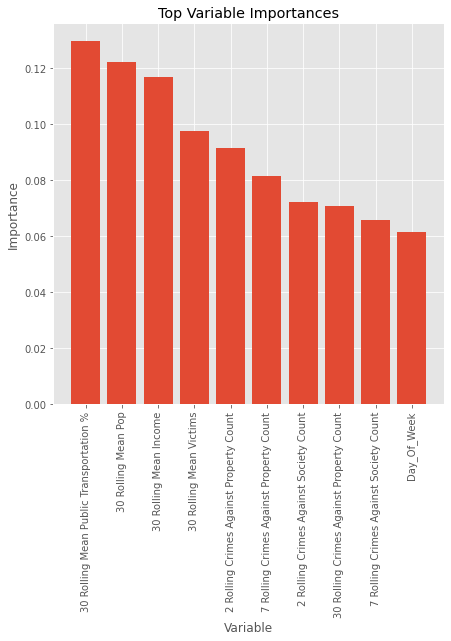

In [618]:
plotImportances(top_importances1, top_features_list1)

In [619]:
len(test_labels1[0])

420

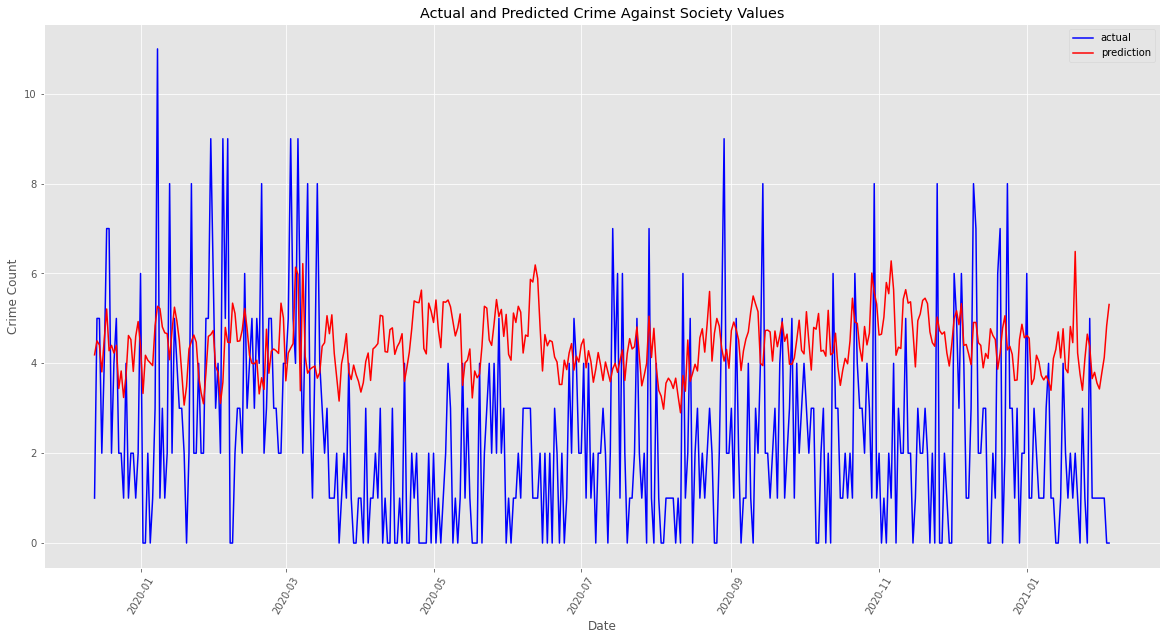

In [620]:
plt.plot(dates, test_labels1[0], 'b-', label = 'actual')# Plot the predicted values
plt.plot(dates, predictions, 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Crime Count'); plt.title('Actual and Predicted Crime Against Society Values');
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [621]:
crimes_against_property_results = pd.DataFrame({'MAE Scores': [mae_list2[0], mae_list2[1], mae_list2[2], mae_list2[3], mae_list2[4], mae_list2[5],
                                           mae_list2[6], mae_list2[7], mae_list2[8], mae_list2[9], mae_list2[10], mae_list2[11], mae_list2[12], 
                                       mae_list2[13], mae_list2[14], mae_list2[15], mae_list2[16], mae_list2[17], mae_list2[18], mae_list2[19]],
                        'MSE Scores': [mse_list2[0], mse_list2[1], mse_list2[2], mse_list2[3], mse_list2[4], mse_list2[5],
                                           mse_list2[6], mse_list2[7], mse_list2[8], mse_list2[9], mse_list2[10], mse_list2[11], mse_list2[12], 
                                       mse_list2[13], mse_list2[14], mse_list2[15], mse_list2[16], mse_list2[17], mse_list2[18], mse_list2[19]],
                        'MAPE Scores': [mape_list2[0], mape_list2[1], mape_list2[2], mape_list2[3], mape_list2[4], mape_list2[5],
                                           mape_list2[6], mape_list2[7], mape_list2[8], mape_list2[9], mape_list2[10], mape_list2[11], mape_list2[12], 
                                       mape_list2[13], mape_list2[14], mape_list2[15], mape_list2[16], mape_list2[17], mape_list2[18], mape_list2[19]]
                       })

                       
crimes_against_property_results.index = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7',
                'Cluster 8', 'Cluster 9', 'Cluster 10', 'Cluster 11', 'Cluster 12', 'Cluster 13', 'Cluster 14', 'Cluster 15',
                'Cluster 16', 'Cluster 17', 'Cluster 18', 'Cluster 19']

In [622]:
crimes_against_property_results

,MAE Scores,MSE Scores,MAPE Scores
Cluster 0,2.014333,6.611726,0.696583
Cluster 1,2.498575,9.350552,0.734914
Cluster 2,1.902416,5.208731,0.970400
Cluster 3,2.495287,9.654228,1.053024
Cluster 4,1.645274,4.168026,0.794597
Cluster 5,1.671884,4.597130,0.632345
Cluster 6,1.256604,2.584714,0.592012
Cluster 7,2.747435,11.826698,0.873885
Cluster 8,1.073314,2.155924,0.470842
Cluster 9,2.567201,12.166982,0.837637


In [623]:
model.fit(training2[0], train_labels2[0])
predictions2 = model.predict(testing2[0])

In [624]:
importances2 = list(model.feature_importances_)
feature_list2 = list(data_final[0].columns)
feature_importances2 = [(feature, importance) for feature, importance in zip(feature_list2,importances2)]
feature_importances2 = sorted(feature_importances2, key = lambda x: x[1], reverse=True)

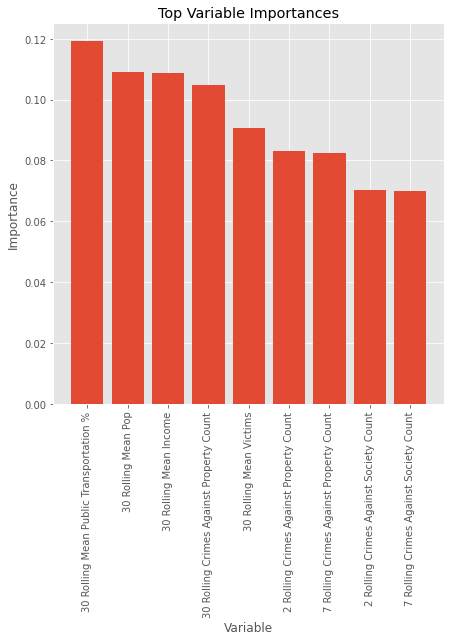

In [625]:
top_features_list2, top_importances2 = getImportances(feature_importances2)
plotImportances(top_importances2, top_features_list2)

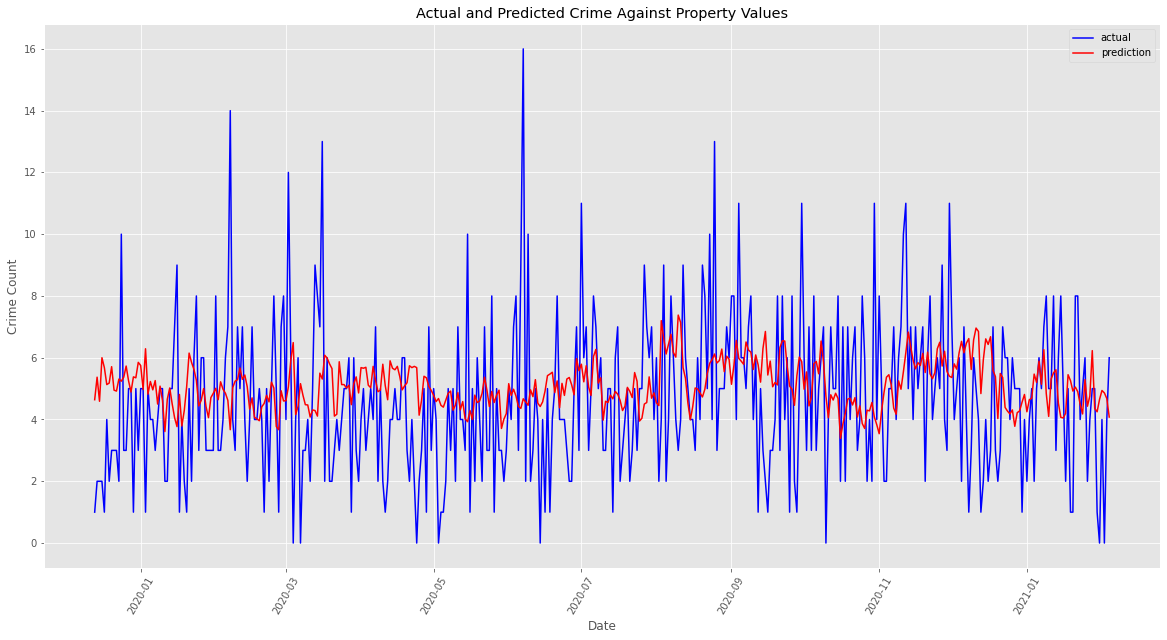

In [626]:
plt.plot(dates, test_labels2[0], 'b-', label = 'actual')# Plot the predicted values
plt.plot(dates, predictions2, 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Crime Count'); plt.title('Actual and Predicted Crime Against Property Values');
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [627]:
crimes_against_persons_results = pd.DataFrame({'MAE Scores': [mae_list3[0], mae_list3[1], mae_list3[2], mae_list3[3], mae_list3[4], mae_list3[5],
                                           mae_list3[6], mae_list3[7], mae_list3[8], mae_list3[9], mae_list3[10], mae_list3[11], mae_list3[12], 
                                       mae_list3[13], mae_list3[14], mae_list3[15], mae_list3[16], mae_list3[17], mae_list3[18], mae_list3[19]],
                        'MSE Scores': [mse_list3[0], mse_list3[1], mse_list3[2], mse_list3[3], mse_list3[4], mse_list3[5],
                                           mse_list3[6], mse_list3[7], mse_list3[8], mse_list3[9], mse_list3[10], mse_list3[11], mse_list3[12], 
                                       mse_list3[13], mse_list3[14], mse_list3[15], mse_list3[16], mse_list3[17], mse_list3[18], mse_list3[19]],
                        'MAPE Scores': [mape_list3[0], mape_list3[1], mape_list3[2], mape_list3[3], mape_list3[4], mape_list3[5],
                                           mape_list3[6], mape_list3[7], mape_list3[8], mape_list3[9], mape_list3[10], mape_list3[11], mape_list3[12], 
                                       mape_list3[13], mape_list3[14], mape_list3[15], mape_list3[16], mape_list3[17], mape_list3[18], mape_list3[19]]
                       })

                       
crimes_against_persons_results.index = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7',
                'Cluster 8', 'Cluster 9', 'Cluster 10', 'Cluster 11', 'Cluster 12', 'Cluster 13', 'Cluster 14', 'Cluster 15',
                'Cluster 16', 'Cluster 17', 'Cluster 18', 'Cluster 19']

In [628]:
crimes_against_persons_results

,MAE Scores,MSE Scores,MAPE Scores
Cluster 0,1.161690,1.975849,0.512898
Cluster 1,0.859097,1.121407,0.338161
Cluster 2,0.705789,0.746324,0.325095
Cluster 3,0.692416,0.698045,0.343065
Cluster 4,0.630221,0.517645,0.459149
Cluster 5,0.724879,0.790800,0.480958
Cluster 6,0.513931,0.381401,0.592783
Cluster 7,1.144371,1.810833,0.541842
Cluster 8,0.450868,0.335666,0.710266
Cluster 9,0.720574,0.718868,0.426515


In [629]:
model.fit(training3[0], train_labels3[0])
predictions3 = model.predict(testing3[0])

In [630]:
importances3 = list(model.feature_importances_)
feature_list3 = list(data_final[0].columns)
feature_importances3 = [(feature, importance) for feature, importance in zip(feature_list3,importances3)]
feature_importances3 = sorted(feature_importances3, key = lambda x: x[1], reverse=True)

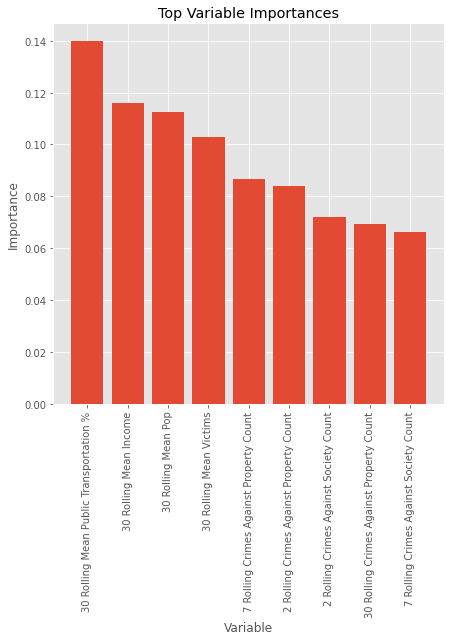

In [631]:
top_features_list3, top_importances3 = getImportances(feature_importances3)
plotImportances(top_importances3, top_features_list3)

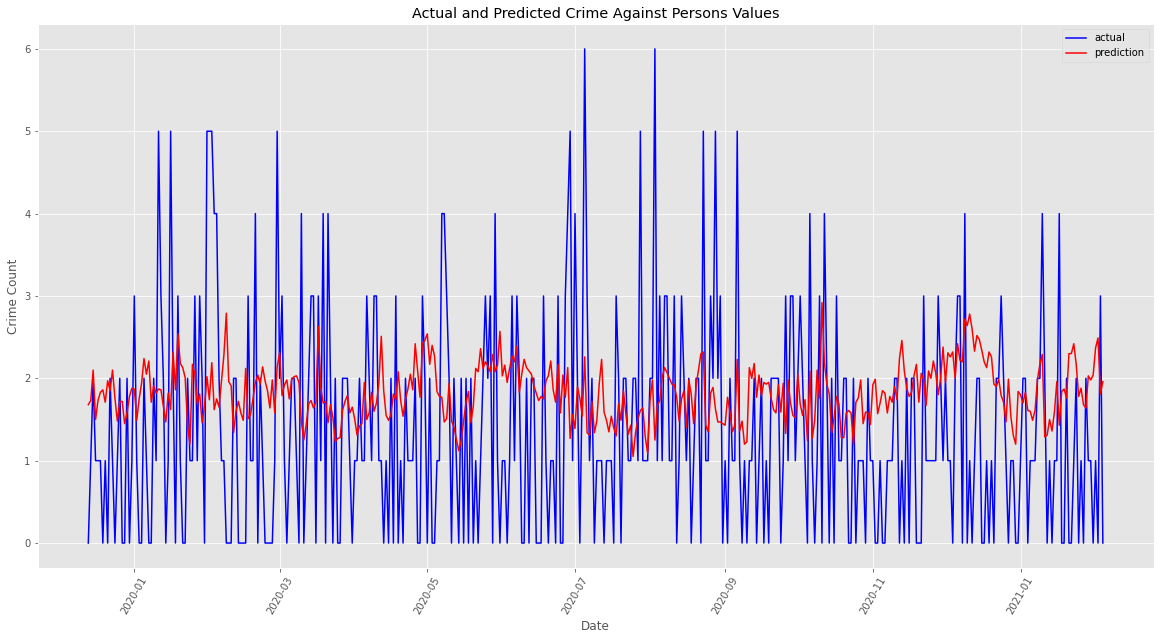

In [632]:
plt.plot(dates, test_labels3[0], 'b-', label = 'actual')# Plot the predicted values
plt.plot(dates, predictions3, 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Crime Count'); plt.title('Actual and Predicted Crime Against Persons Values');
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()